#2 Bim - Trabalho - Aprendizado Não Supervisionado
Aluno: Lucas Volkmann
## Aprendizado não supervisionado (PCA, K Means e Agrupamento Hierárquico)


## Leitura e análise inicial dos dados


In [219]:
import numpy as np
import pandas as pd

In [220]:
import warnings
warnings.filterwarnings("ignore")

In [221]:
%matplotlib inline

df = pd.read_excel('C:/Users/Pichau/Desktop/Documents/SegurançaBrasilLimpo2.xlsx')
                      

In [222]:

df.head(50)

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime
0,Homicídio doloso,2022,Feminino,2
1,Homicídio doloso,2022,Masculino,8
2,Homicídio doloso,2022,Feminino,0
3,Homicídio doloso,2022,Masculino,10
4,Homicídio doloso,2022,Feminino,2
5,Homicídio doloso,2022,Masculino,19
6,Homicídio doloso,2022,Feminino,2
7,Homicídio doloso,2022,Masculino,19
8,Homicídio doloso,2022,Feminino,6
9,Homicídio doloso,2022,Masculino,17


In [223]:
df.head(4)

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime
0,Homicídio doloso,2022,Feminino,2
1,Homicídio doloso,2022,Masculino,8
2,Homicídio doloso,2022,Feminino,0
3,Homicídio doloso,2022,Masculino,10


In [224]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

Tipo Crime         0
Ano do crime       0
Sexo da Vítima     0
Vitima do crime    0
dtype: int64

In [225]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

Tipo Crime         object
Ano do crime        int64
Sexo da Vítima     object
Vitima do crime     int64
dtype: object

In [226]:
df.describe()

,Ano do crime,Vitima do crime
count,1102.000000,1102.000000
mean,2019.549002,22.340290
std,1.726761,55.274802
min,2018.000000,0.000000
25%,2018.000000,0.000000
50%,2019.000000,2.000000
75%,2022.000000,11.000000
max,2022.000000,463.000000


In [227]:
import plotly.express as px

In [228]:
boxplot = px.box(df, y="Vitima do crime")
boxplot.show()

In [229]:
boxplot = px.box(df, y="Ano do crime")
boxplot.show()

In [230]:
df.head(4)

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime
0,Homicídio doloso,2022,Feminino,2
1,Homicídio doloso,2022,Masculino,8
2,Homicídio doloso,2022,Feminino,0
3,Homicídio doloso,2022,Masculino,10


In [231]:
df['Sexo da Vítima'].replace({'Feminino': 0, 'Masculino': 1}, inplace=True)

In [232]:
df['Tipo Crime'].replace({'Homicídio doloso': 1, 'Lesão corporal seguida de morte': 2,'Roubo seguido de morte (latrocínio)': 3}, inplace=True)

In [233]:
df.head(4)

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime
0,1,2022,0,2
1,1,2022,1,8
2,1,2022,0,0
3,1,2022,1,10


In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)

In [236]:
df_esc

array([[-1.09446631,  1.4200643 , -1.06567299, -0.36815194],
       [-1.09446631,  1.4200643 ,  0.93837417, -0.2595541 ],
       [-1.09446631,  1.4200643 , -1.06567299, -0.40435122],
       ...,
       [-1.09446631, -0.89746381,  0.93837417,  1.02552036],
       [-1.09446631, -0.89746381, -1.06567299, -0.2595541 ],
       [-1.09446631, -0.89746381,  0.93837417,  1.33321425]])

In [237]:
df_esc.shape

(1102, 4)

In [238]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

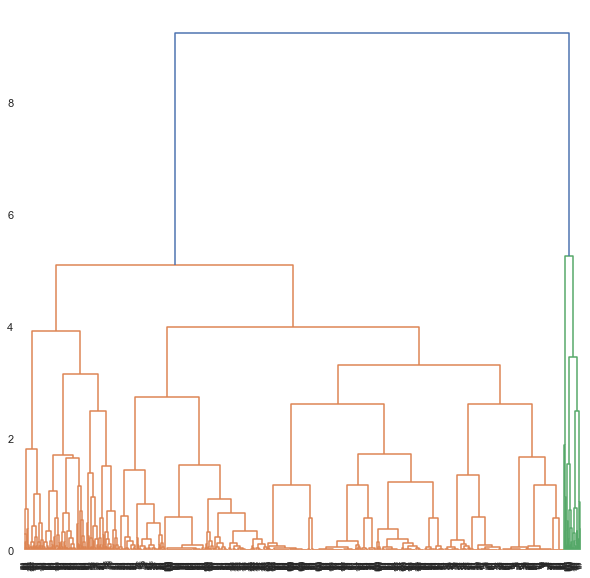

In [239]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df_esc, method = 'complete')) #complete, single e ward (dados dispersos)

In [240]:
from sklearn.cluster import AgglomerativeClustering

In [241]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao = hier.fit_predict(df_esc)

In [242]:
classificacao

array([0, 1, 0, ..., 4, 0, 4], dtype=int64)

In [243]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,1
2,0
3,1
4,0
...,...
1097,4
1098,0
1099,4
1100,0


In [244]:
df_hc = pd.concat([df, agrupamento],axis=1)
df_hc

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime,Grupo
0,1,2022,0,2,0
1,1,2022,1,8,1
2,1,2022,0,0,0
3,1,2022,1,10,1
4,1,2022,0,2,0
...,...,...,...,...,...
1097,1,2018,1,90,4
1098,1,2018,0,5,0
1099,1,2018,1,79,4
1100,1,2018,0,8,0


In [245]:
grupo = df_hc.loc[df_hc.Grupo == 6]
grupo.head(2)

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime,Grupo
402,3,2020,1,1,6
404,3,2020,1,0,6


## K Means

In [246]:
from sklearn.decomposition import PCA

In [247]:
pca = PCA(n_components = 2)

In [248]:
df2_pca = pca.fit_transform(df_esc)

In [249]:
df2_pca

array([[-0.21139388,  1.95913359],
       [ 0.68615915,  0.54373816],
       [-0.23742288,  1.95938099],
       ...,
       [ 1.80447366, -0.38043348],
       [ 0.06097817,  1.04300237],
       [ 2.02572015, -0.38253636]])

In [250]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.37338037, 0.26153827])

In [251]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.634918639681681

In [252]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

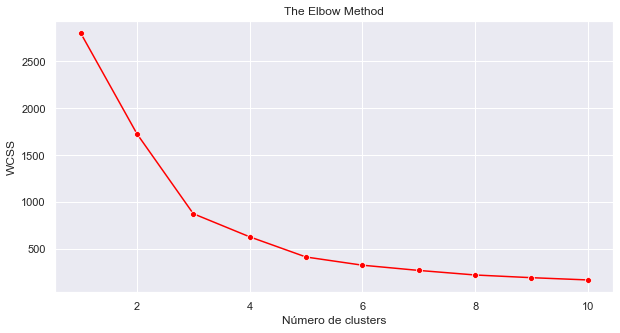

In [254]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [255]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [256]:
kmeans_fit = kmeans.fit(df2_pca)

In [257]:
# Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 2.10098069, -0.0928921 ],
       [-0.2750275 , -1.0941023 ],
       [-0.12074121,  1.28449382],
       [-1.16580582,  0.14563678]])

In [258]:
# Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([2, 2, 2, ..., 0, 2, 0])

In [259]:
classificacao[2]

2

In [260]:
import plotly.express as px
import plotly.graph_objects as go

In [261]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [262]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
1097,0
1098,2
1099,0
1100,2


In [263]:
df = pd.concat([df, agrupamento],axis=1)
df

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime,Grupo
0,1,2022,0,2,2
1,1,2022,1,8,2
2,1,2022,0,0,2
3,1,2022,1,10,2
4,1,2022,0,2,2
...,...,...,...,...,...
1097,1,2018,1,90,0
1098,1,2018,0,5,2
1099,1,2018,1,79,0
1100,1,2018,0,8,2


In [264]:
df.iloc[125 , :]

Tipo Crime            3
Ano do crime       2022
Sexo da Vítima        1
Vitima do crime       5
Grupo                 1
Name: 125, dtype: int64

In [265]:
grupo0 = df.loc[df.Grupo == 0]
grupo0 

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime,Grupo
23,1,2022,1,91,0
25,1,2022,1,85,0
27,1,2022,1,87,0
29,1,2022,1,103,0
31,1,2022,1,87,0
...,...,...,...,...,...
1093,1,2018,1,82,0
1095,1,2018,1,83,0
1097,1,2018,1,90,0
1099,1,2018,1,79,0


In [266]:
grupo0.shape

(199, 5)

 ## PCA

In [270]:
df_pca = df.iloc[:,:].values
df_pca

array([[   1, 2022,    0,    2,    2],
       [   1, 2022,    1,    8,    2],
       [   1, 2022,    0,    0,    2],
       ...,
       [   1, 2018,    1,   79,    0],
       [   1, 2018,    0,    8,    2],
       [   1, 2018,    1,   96,    0]], dtype=int64)

In [285]:
le = LabelEncoder()
df_pca = le.fit_transform(df_pca[:,1])
df_pca

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [286]:
from sklearn.preprocessing import LabelEncoder

In [287]:
df['Genre'] = df_pca
df.head()

,Tipo Crime,Ano do crime,Sexo da Vítima,Vitima do crime,Grupo,Genre
0,1,2022,0,2,2,4
1,1,2022,1,8,2,4
2,1,2022,0,0,2,4
3,1,2022,1,10,2,4
4,1,2022,0,2,2,4


In [288]:
from sklearn.decomposition import PCA

In [289]:
pca = PCA(n_components=2)

In [290]:
pca_transform = pca.fit_transform(df)

In [291]:
pca_transform.shape

(1102, 2)

In [292]:
# Componentes principais
pca_transform

array([[-20.34716339,   3.42732633],
       [-14.34479327,   3.4397622 ],
       [-22.34702535,   3.42311029],
       ...,
       [ 56.6819767 ,  -2.04371052],
       [-14.33467727,  -2.21617045],
       [ 73.68080332,  -2.0078742 ]])

In [293]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.99754063, 0.00194199])

In [294]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.9994826213462297

In [295]:
import plotly.express as px

In [296]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_transform,
    labels=labels,
    dimensions=range(2), # numero de componentes do pca (PCA(n_components=2))
    color=df["Genre"]
)
fig.update_traces(diagonal_visible=False)
fig.show()